In [57]:
!pip install pandas
!pip install statsmodels


[notice] A new release of pip available: 22.3 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


# Prédiction de l'insolation (en h)

In [75]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np

dossier = './data/IN'

dfs = []

for fichier in os.listdir(dossier):
    if fichier.endswith('.csv'):
        chemin_fichier = os.path.join(dossier, fichier)
        df = pd.read_csv(chemin_fichier, delimiter=';', skiprows=11)
        dfs.append(df)

data_IN = pd.concat(dfs, ignore_index=True)
data_IN.head()
data_IN['YYYYMM'] = pd.to_datetime(data_IN['YYYYMM'], format='%Y%m')
pd.DataFrame(data_IN.groupby('YYYYMM').mean())
# data_IN.to_csv('./IN.csv', index=False)

,VALEUR,Q_HOM
YYYYMM,,
1931-01-01,76.470370,1.0
1931-02-01,88.218519,1.0
1931-03-01,153.333333,1.0
1931-04-01,166.425926,1.0
1931-05-01,206.933333,1.0
...,...,...
2014-08-01,206.388889,1.0
2014-09-01,227.244444,1.0
2014-10-01,160.762963,1.0


In [76]:
in_mean = data_IN.groupby('YYYYMM').mean()
in_mean_df = pd.DataFrame(in_mean)
in_mean_df

,VALEUR,Q_HOM
YYYYMM,,
1931-01-01,76.470370,1.0
1931-02-01,88.218519,1.0
1931-03-01,153.333333,1.0
1931-04-01,166.425926,1.0
1931-05-01,206.933333,1.0
...,...,...
2014-08-01,206.388889,1.0
2014-09-01,227.244444,1.0
2014-10-01,160.762963,1.0


In [77]:
in_mean_df = in_mean_df.reset_index()
in_mean_df

,YYYYMM,VALEUR,Q_HOM
0,1931-01-01,76.470370,1.0
1,1931-02-01,88.218519,1.0
2,1931-03-01,153.333333,1.0
3,1931-04-01,166.425926,1.0
4,1931-05-01,206.933333,1.0
...,...,...,...
1003,2014-08-01,206.388889,1.0
1004,2014-09-01,227.244444,1.0
1005,2014-10-01,160.762963,1.0
1006,2014-11-01,82.474074,1.0


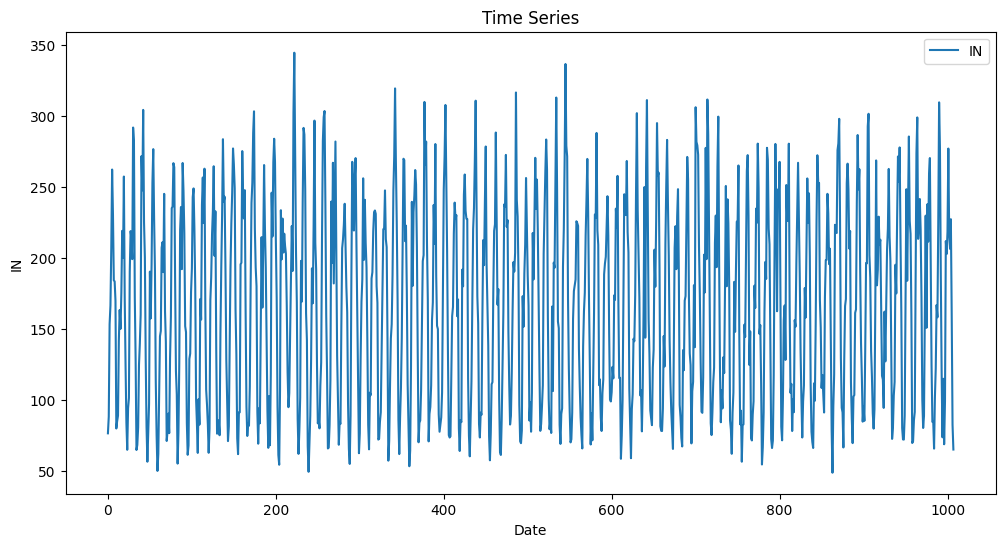

(-6.803494463306399,
 2.2065007072768146e-09,
 22,
 985,
 {'1%': -3.4370062675076807,
  '5%': -2.8644787205542492,
  '10%': -2.568334722615888},
 9434.280359146089)

In [78]:
plt.figure(figsize=(12, 6))
plt.plot(in_mean_df['VALEUR'], label='IN')
plt.title('Time Series')
plt.xlabel('Date')
plt.ylabel('IN')
plt.legend()
plt.show()

adf_in_test_result = adfuller(in_mean_df['VALEUR'])

adf_in_test_result

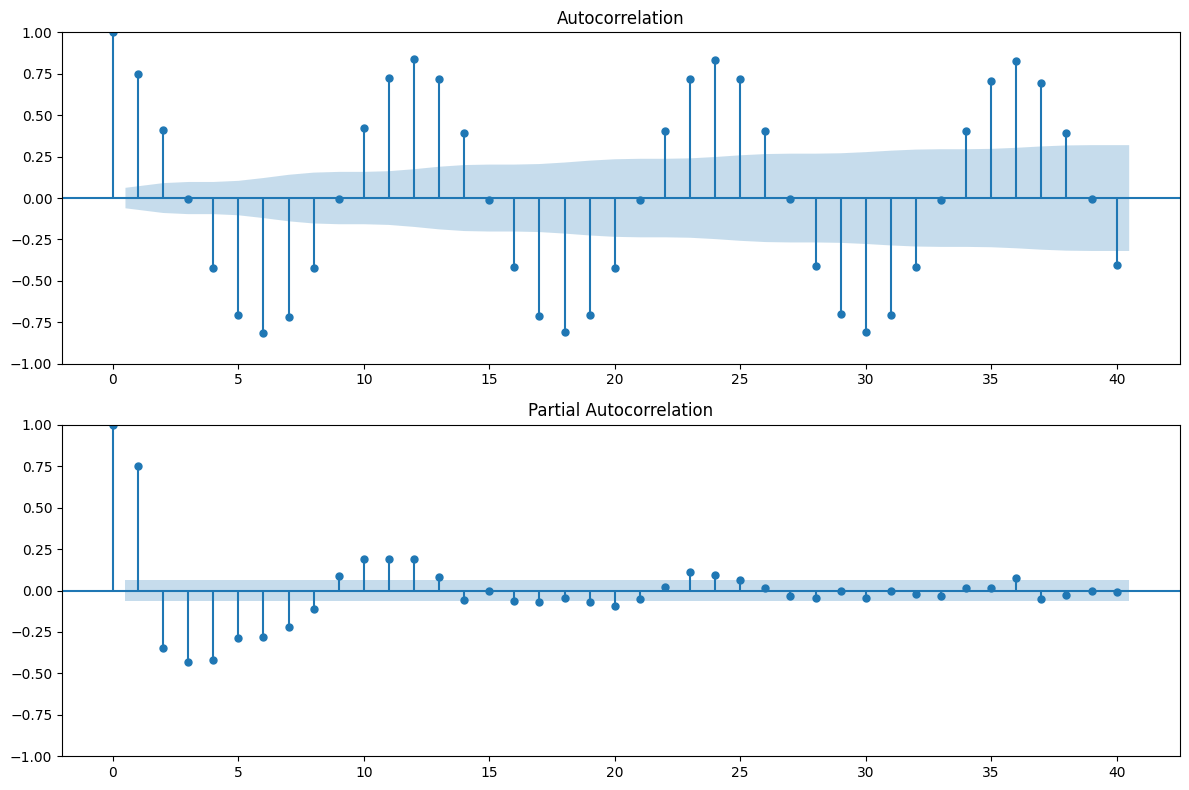

In [79]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

plot_acf(in_mean_df['VALEUR'], ax=ax1, lags=40)

plot_pacf(in_mean_df['VALEUR'], ax=ax2, lags=40)

plt.tight_layout()
plt.show()

In [80]:
train_size = int(len(in_mean_df) * 0.8)
train, test = in_mean_df['VALEUR'][:train_size], in_mean_df['VALEUR'][train_size:]

model = ARIMA(train, order=(2,1,2))
model_fit = model.fit()

forecast = model_fit.forecast(steps=len(test))

c:\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


In [81]:
mse = mean_squared_error(test, forecast)
rmse = np.sqrt(mse)
print(rmse)

66.98535075278829


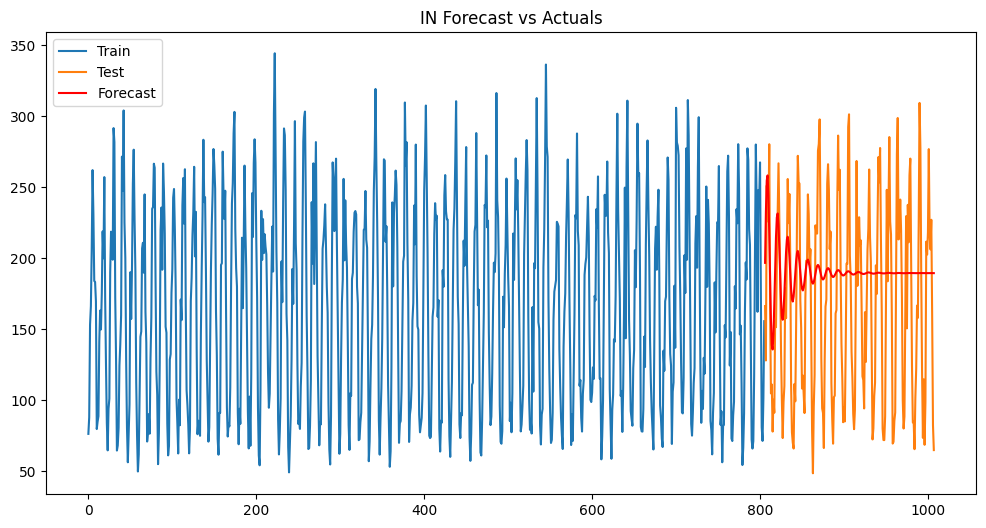

In [82]:
plt.figure(figsize=(12,6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(test.index, forecast, label='Forecast', color='red')
plt.title('IN Forecast vs Actuals')
plt.legend()
plt.show()

In [83]:
import os
import pandas as pd

dossier = './data/RR/'

dfs = []

for fichier in os.listdir(dossier):
    if fichier.endswith('.csv'):
        chemin_fichier = os.path.join(dossier, fichier)
        df = pd.read_csv(chemin_fichier, delimiter=';', skiprows=12)
        dfs.append(df)

data_RR = pd.concat(dfs, ignore_index=True)
data_RR.head()
# data_RR.to_csv('./RR.csv', index=False)
data_RR['YYYYMM'] = pd.to_datetime(data_RR['YYYYMM'], format='%Y%m')
pd.DataFrame(data_RR.groupby(['YYYYMM']).sum())

,VALEUR,Q_HOM
YYYYMM,,
1945-01-01,469.7,8
1945-02-01,369.0,8
1945-03-01,187.7,8
1945-04-01,163.8,8
1945-05-01,426.1,8
...,...,...
2022-08-01,45435.4,0
2022-09-01,82575.4,0
2022-10-01,58764.8,0


In [84]:
rr_mean = data_IN.groupby('YYYYMM').mean()
rr_mean_df = pd.DataFrame(rr_mean)
rr_mean_df = rr_mean_df.reset_index()

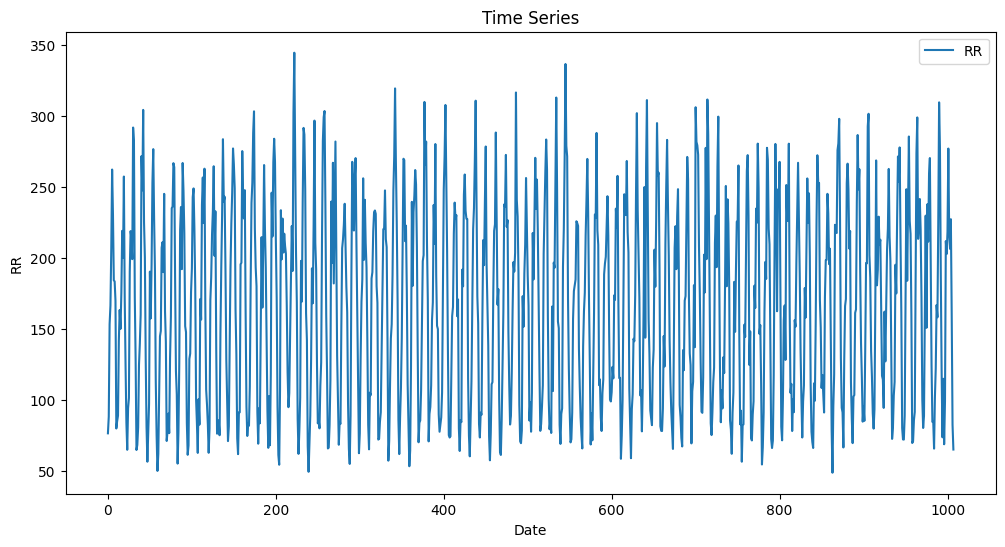

(-6.803494463306399,
 2.2065007072768146e-09,
 22,
 985,
 {'1%': -3.4370062675076807,
  '5%': -2.8644787205542492,
  '10%': -2.568334722615888},
 9434.280359146089)

In [85]:
plt.figure(figsize=(12, 6))
plt.plot(rr_mean_df['VALEUR'], label='RR')
plt.title('Time Series')
plt.xlabel('Date')
plt.ylabel('RR')
plt.legend()
plt.show()

adf_rr_test_result = adfuller(rr_mean_df['VALEUR'])

adf_rr_test_result

In [53]:
import os
import pandas as pd

dossier = './data/TN/'

dfs = []

for fichier in os.listdir(dossier):
    if fichier.endswith('.csv'):
        chemin_fichier = os.path.join(dossier, fichier)
        df = pd.read_csv(chemin_fichier, delimiter=';', skiprows=12)
        dfs.append(df)

data_TN = pd.concat(dfs, ignore_index=True)
data_TN = data_TN.head(2000)
data_TN.head()
# data_TN.to_csv('./TN.csv', index=False)
data_TN['YYYYMM'] = pd.to_datetime(data_TN['YYYYMM'], format='%Y%m')
pd.DataFrame(data_TN.groupby(['YYYYMM']).mean())

,VALEUR,Q_HOM
YYYYMM,,
1951-01-01,-1.40,1.0
1951-02-01,-1.10,1.0
1951-03-01,0.30,1.0
1951-04-01,4.20,1.0
1951-05-01,7.00,1.0
...,...,...
2022-08-01,14.35,0.5
2022-09-01,10.35,0.5
2022-10-01,10.90,0.5


In [50]:
import os
import pandas as pd

dossier = './data/TX/'

dfs = []

for fichier in os.listdir(dossier):
    if fichier.endswith('.csv'):
        chemin_fichier = os.path.join(dossier, fichier)
        df = pd.read_csv(chemin_fichier, delimiter=';', skiprows=12)
        dfs.append(df)

data_TX = pd.concat(dfs, ignore_index=True)
data_TX = data_TX.head(2000)
# data_TX.to_csv('./TX.csv', index=False)
data_TX['YYYYMM'] = pd.to_datetime(data_TX['YYYYMM'], format='%Y%m')
pd.DataFrame(data_TX.groupby(['YYYYMM']).mean())

,VALEUR,Q_HOM
YYYYMM,,
1959-01-01,4.933333,1.0
1959-02-01,9.800000,1.0
1959-03-01,12.266667,1.0
1959-04-01,14.266667,1.0
1959-05-01,19.100000,1.0
...,...,...
2022-08-01,28.400000,0.5
2022-09-01,21.300000,0.5
2022-10-01,21.450000,0.5


In [59]:
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Charger les données
series = data_TX['VALEUR']

# Diviser les données en ensembles d'entraînement et de test
train_size = int(len(series) * 0.8)
train, test = series[0:train_size], series[train_size:len(series)]

# Créer et ajuster le modèle ARIMA
model = ARIMA(train, order=(5,1,0))
model_fit = model.fit()

# Faire des prédictions
predictions = model_fit.forecast(steps=len(test))[0]

# Évaluer les performances du modèle
error = mean_squared_error(test, predictions)
print('Erreur quadratique moyenne :', error)

# Afficher les prédictions et les données de test
plt.plot(test.index, test, label='Données de test')
plt.plot(test.index, predictions, color='red', label='Prédictions')
plt.xlabel('Date')
plt.ylabel('Valeur')
plt.title('Prédictions ARIMA vs Données de test')
plt.legend()
plt.show()

# Faire des prédictions pour l'avenir
future_steps = 12  # Nombre de pas de temps pour les prédictions futures
future_forecast = model_fit.forecast(steps=future_steps)

# Afficher les prédictions pour l'avenir
plt.plot(series.index, series, label='Données')
plt.plot(pd.date_range(start=series.index[-1], periods=future_steps+1, freq='M')[1:], future_forecast, color='green', label='Prédictions futures')
plt.xlabel('Date')
plt.ylabel('Valeur')
plt.title('Prédictions ARIMA pour l\'avenir')
plt.legend()
plt.show()

c:\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning

KeyError: 0

In [43]:
pd.DataFrame(df_combined.groupby(['YYYYMM', 'Type'])[''].sum())

VALEUR  Q_HOM
YYYYMM Type               
193101 IN     238.9      2
193102 IN     219.9      2
193103 IN     238.7      2
193104 IN     424.7      2
193105 IN     445.2      2
...             ...    ...
202211 TN      11.4      1
       TX      24.2      1
202212 RR     327.2      0
       TN       3.7      1
       TX      14.9      1

[3504 rows x 2 columns]

In [19]:
data = pd.read_csv('chef.csv', delimiter=';')
data_filtered = data.loc[(data['AAAAMM'] >= 200001) | (data['AAAAMM'] < 195001)]
data_filtered


,NUM_POSTE,NOM_USUEL,LAT,LON,ALTI,AAAAMM,RR,QRR,NBRR,RR_ME,...,QNEIGETOTM,NEIGETOTAB,QNEIGETOTAB,NEIGETOTABDAT,NBJNEIGETOT1,NBJNEIGETOT10,NBJNEIGETOT30,NBJGREL,NBJORAG,NBJBROU
523,74001001,ABONDANCE,46.284500,6.734167,947,200001,41.8,1.0,31.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
524,74001001,ABONDANCE,46.284500,6.734167,947,200002,148.3,1.0,29.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
525,74001001,ABONDANCE,46.284500,6.734167,947,200003,90.3,1.0,31.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
526,74001001,ABONDANCE,46.284500,6.734167,947,200004,103.8,1.0,30.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
527,74001001,ABONDANCE,46.284500,6.734167,947,200005,108.7,1.0,31.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44344,74500001,GENEVE,46.247333,6.127667,411,202208,48.0,1.0,31.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44345,74500001,GENEVE,46.247333,6.127667,411,202209,120.1,1.0,30.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44346,74500001,GENEVE,46.247333,6.127667,411,202210,76.8,1.0,31.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44347,74500001,GENEVE,46.247333,6.127667,411,202211,106.5,1.0,30.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
